# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp=pd.read_csv("../your-code/Temp_States.csv")
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Print `temp`

In [3]:
print(temp)


         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes


City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
subset=temp[temp['State'] == 'New York']
subset

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
subset['Temperature'].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
filtered_temp = temp[temp['Temperature'] > 15]
result = filtered_temp[['City', 'State', 'Temperature']]
result

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp[['City','Temperature']][temp['Temperature'] > 15]


,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
temp[['City', 'Temperature']][(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]


,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
state_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
state_stats

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employees=pd.read_csv("../your-code/Employee.csv")
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [ ]:
#objects and integrers for years and Salaries

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [13]:
import seaborn as sns


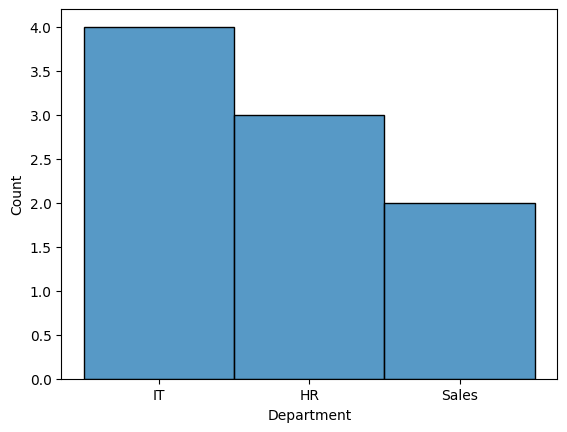

In [14]:
sns.histplot(x=employees.Department, binwidth="5");


In [ ]:
# + freq dpt is IT

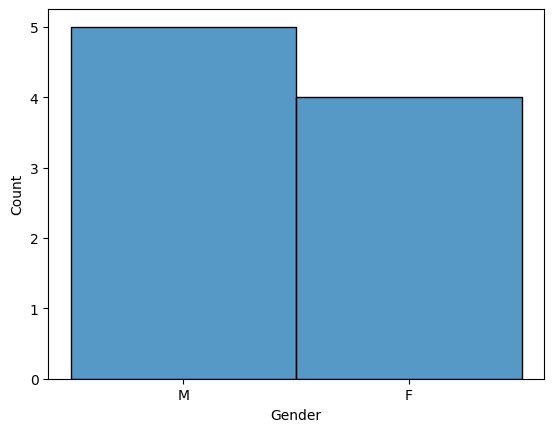

In [16]:
sns.histplot(x=employees.Gender,binwidth=5);


In [ ]:
# More M's

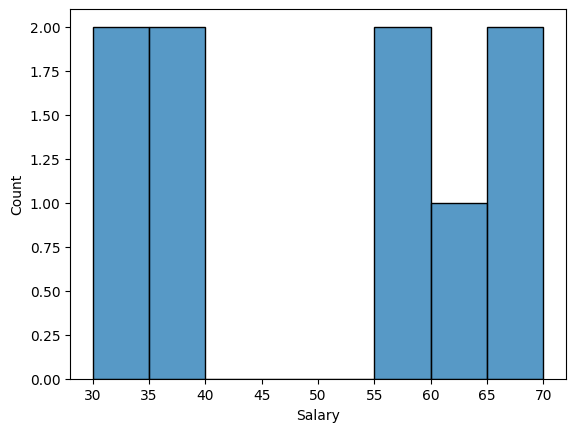

In [17]:
sns.histplot(x=employees.Salary,binwidth=5);


In [ ]:
# equally dist.

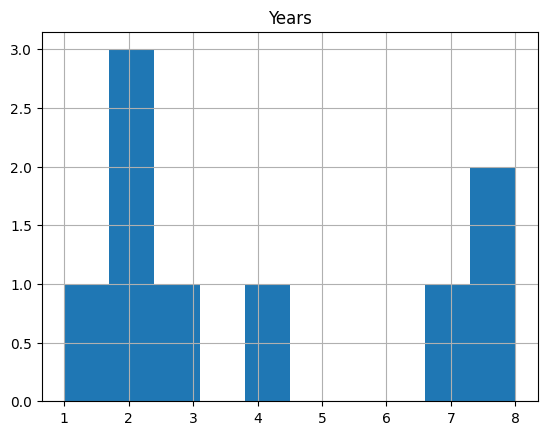

In [19]:
employees.hist(column='Years');


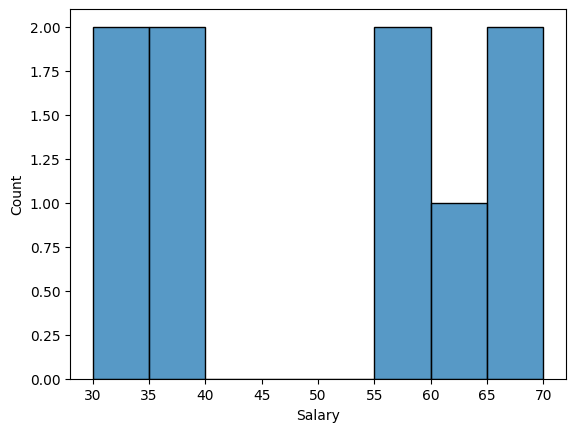

In [18]:
sns.histplot(x=employees.Salary,binwidth=5);


#### What's the average salary in this company?

In [20]:
employees['Salary'].mean()


48.888888888888886

#### What's the highest salary?

In [21]:
employees['Salary'].max()


70

#### What's the lowest salary?

In [22]:
employees['Salary'].min()


30

#### Who are the employees with the lowest salary?

In [23]:
import pandas as pd

min_salary = employees['Salary'].min()
lowest_salary = employees[employees['Salary'] == min_salary]
lowest_salary[['Name', 'Salary']]

,Name,Salary
1,Maria,30
2,David,30


#### Could you give all the information about an employee called David?

In [24]:
employees[employees['Name']=='David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [25]:
employees[employees['Name']=='David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Print all the rows where job title is associate

In [26]:
employees[employees['Title'] == 'associate']


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [27]:
employees[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [28]:
employees.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [30]:
df1=employees[(employees['Title'] == 'associate') & (employees['Salary'] > 55)]
df1 = df[['Name','Title', 'Salary']]
df1

NameError: name 'df' is not defined

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [31]:
employees.groupby('Years')['Salary'].mean()


Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [32]:
employees.groupby('Title')['Salary'].mean()


Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

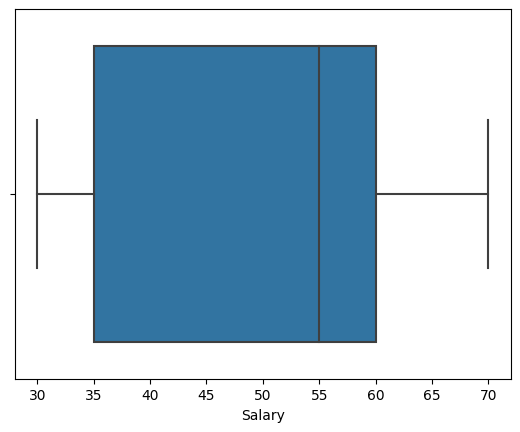

In [33]:
sns.boxplot(x=employees.Salary);


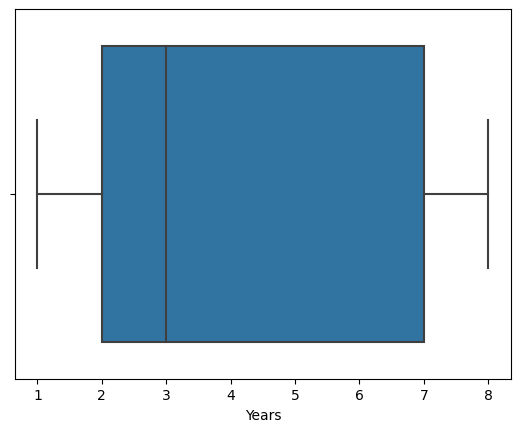

In [34]:
sns.boxplot(x=employees.Years);


In [35]:
employees.dropna().Salary.quantile(.75)


60.0

In [36]:
employees.dropna().Salary.quantile(.25)


35.0

#### Is the mean salary per gender different?

In [37]:
employees.groupby(['Gender'])['Salary'].mean()


Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [38]:
numeric_columns = ['Years', 'Salary']
department_calc= employees.groupby('Department')[numeric_columns].agg(['min', 'mean', 'max'])
department_calc

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

In [39]:
employees.groupby('Department')[['Years', 'Salary']].agg(['min', 'mean', 'max'])


Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

In [40]:
employees.groupby('Department')['Salary'].agg(lambda x: x.max()-x.min())


Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
Open the Orders.csv dataset. Name your dataset orders
Orders=pd.read_csv("../your-code/Orders.csv")
Orders.sample()

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [48]:
Orders.dtypes


Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [49]:
Orders.describe()


,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [50]:
Orders['amount_spent'].mean()


22.39474850474768

#### What were the highest and lowest purchase prices? 

In [51]:
Orders['amount_spent'].max()


168469.6

In [52]:
Orders['amount_spent'].min()


0.0

#### Select all the customers we have in Spain

In [53]:
Orders[Orders['Country'] == 'Spain']


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [54]:
Orders[['CustomerID']][Orders['Country']== "Spain"].value_counts().unique().sum()


2422

#### Select all the customers who have bought more than 50 items ?

In [55]:
Orders[['CustomerID','Quantity']][Orders['Quantity']>50]


,CustomerID,Quantity
46,13748,80
83,15291,64
96,14688,120
102,14688,96
174,16029,100
...,...,...
397720,18102,144
397721,16626,84
397729,16626,144
397761,15311,96


#### Select orders from Spain that are above 50 items

In [56]:
Orders[['CustomerID','Country','Quantity']][(Orders['Country']== "Spain")&(Orders['Quantity'] > 50)]


,CustomerID,Country,Quantity
4250,12557,Spain,70
4251,12557,Spain,100
4252,12557,Spain,60
4253,12557,Spain,70
4254,12557,Spain,100
32454,12557,Spain,144
32455,12557,Spain,360
32456,12557,Spain,360
32457,12557,Spain,144
91155,12557,Spain,150


#### Select all free orders

In [57]:
Orders[['CustomerID','UnitPrice','Quantity']][(Orders['UnitPrice']== 0)&(Orders['Quantity'] > 1)]


,CustomerID,UnitPrice,Quantity
22539,16560,0.0,4
25379,14911,0.0,10
29080,13081,0.0,24
29082,13081,0.0,24
53788,17560,0.0,16
85671,13239,0.0,36
92875,13113,0.0,5
97430,14410,0.0,2
128641,17667,0.0,4
137127,12415,0.0,80


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [58]:
Orders[['CustomerID', 'Description']][Orders['Description'].str.contains('lunch bag', case=False)]


,CustomerID,Description
93,14688,lunch bag red retrospot
172,17420,lunch bag dolly girl design
354,15862,lunch bag dolly girl design
359,15862,lunch bag red retrospot
360,15862,lunch bag spaceboy design
...,...,...
397465,17001,lunch bag alphabet design
397713,14446,lunch bag black skull.
397714,14446,lunch bag red retrospot
397877,17581,lunch bag red vintage doily


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

<Axes: >

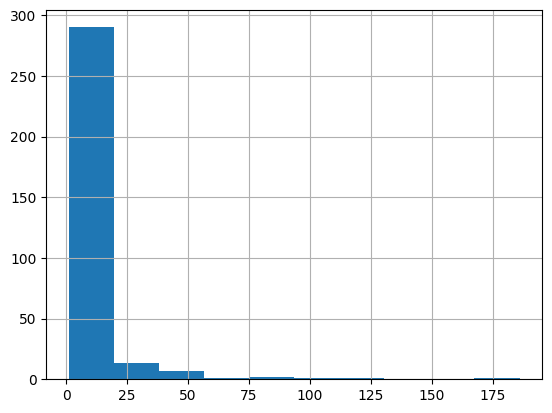

In [59]:
Orders[Orders['Country'] == 'Spain']['amount_spent'].value_counts().hist()


#### Select all orders made in the month of August

In [62]:
Orders[Orders['month'] == 7]


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
172648,245903,558638,84836,2011,7,5,8,zinc metal heart decoration,12,2011-07-01 08:16:00,1.25,16317,United Kingdom,15.00
172649,245904,558638,71459,2011,7,5,8,hanging jam jar t-light holder,24,2011-07-01 08:16:00,0.85,16317,United Kingdom,20.40
172650,245905,558638,22784,2011,7,5,8,lantern cream gazebo,3,2011-07-01 08:16:00,4.95,16317,United Kingdom,14.85
172651,245906,558638,23145,2011,7,5,8,zinc t-light holder star large,12,2011-07-01 08:16:00,0.95,16317,United Kingdom,11.40
172652,245907,558638,22674,2011,7,5,8,french toilet sign blue metal,12,2011-07-01 08:16:00,1.25,16317,United Kingdom,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199470,285416,561903,21900,2011,7,7,16,"key fob , shed",24,2011-07-31 16:04:00,0.65,17162,United Kingdom,15.60
199471,285417,561903,48187,2011,7,7,16,doormat new england,2,2011-07-31 16:04:00,7.95,17162,United Kingdom,15.90
199472,285418,561903,85152,2011,7,7,16,hand over the chocolate sign,12,2011-07-31 16:04:00,2.10,17162,United Kingdom,25.20
199473,285419,561903,82600,2011,7,7,16,no singing metal sign,12,2011-07-31 16:04:00,2.10,17162,United Kingdom,25.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [61]:
Orders[Orders['month'] == 8]['Country'].value_counts()


United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [63]:
Orders.groupby('Country')['amount_spent'].agg(['mean'])


,mean
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [64]:
Orders['UnitPrice'].max()


8142.75

#### What was the average amount spent per year ?

In [65]:
Orders.groupby('year')['amount_spent'].agg(['mean'])


,mean
year,
2010,21.892733
2011,22.430074
